<a href="https://colab.research.google.com/github/RodrigoPretes/MeuProjeto/blob/main/Exemplo_06_c_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install scikit-fuzzy --upgrade


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fz
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize']=[15,10]

In [13]:
arq = '/content/social-network-ads.csv'
compras = pd.read_csv(arq, sep=',')
compras.head(10)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


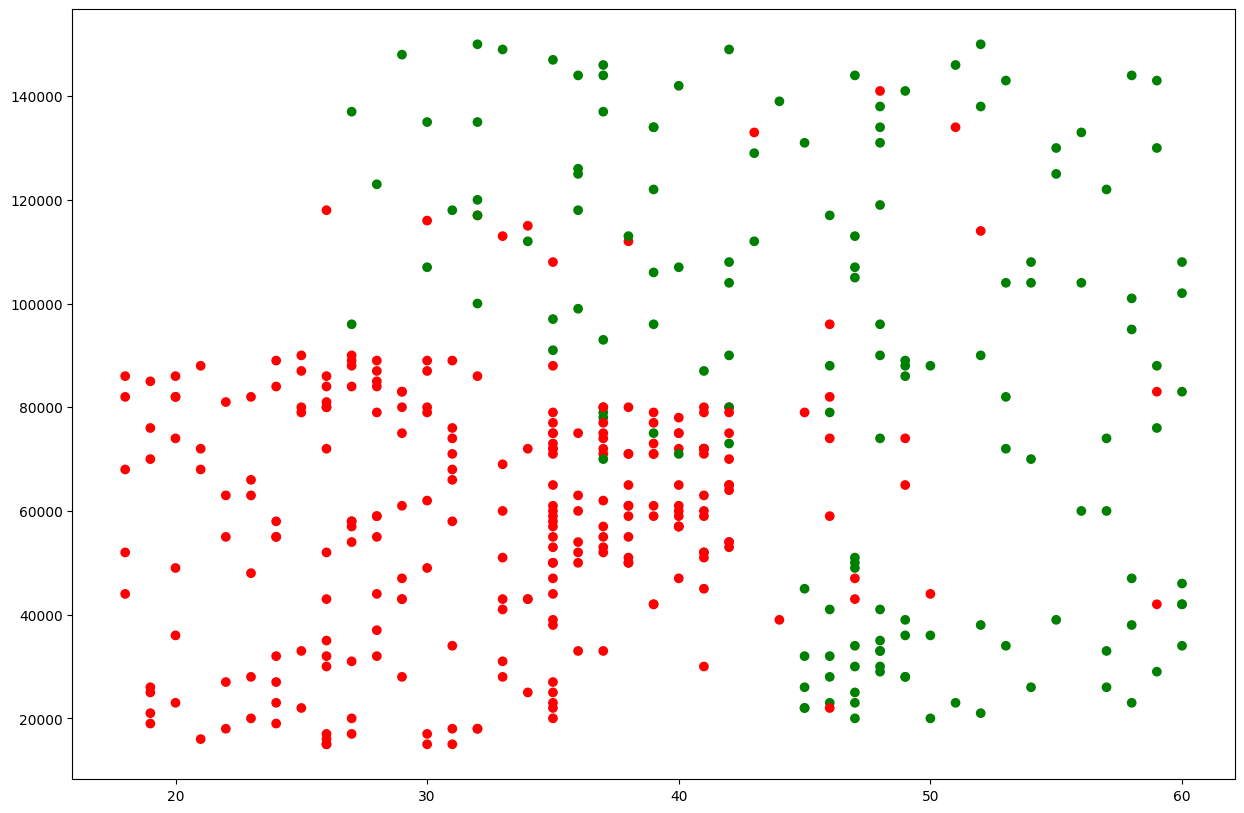

In [14]:

fig, ax = plt.subplots()
colors = {0:'red', 1:'green'}
ax.scatter(compras['Age'], compras['EstimatedSalary'],c=compras['Purchased'].map(colors))
plt.show()


In [15]:
compras_atributos = compras[['Age','EstimatedSalary']]
compras_classes = compras['Purchased']

In [16]:

scaler = StandardScaler()
compras_atributos = scaler.fit_transform(compras_atributos)


In [17]:
agrupamento = fz.cmeans(data=compras_atributos.T, c = 2, m = 2, error=0.005, maxiter=1000)

grau_pertinencia = agrupamento[1]

grau_pertinencia.shape

grau_pertinencia[0][0]

grau_pertinencia[1][0]

clusters = grau_pertinencia.argmax(axis=0)

clusters

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,

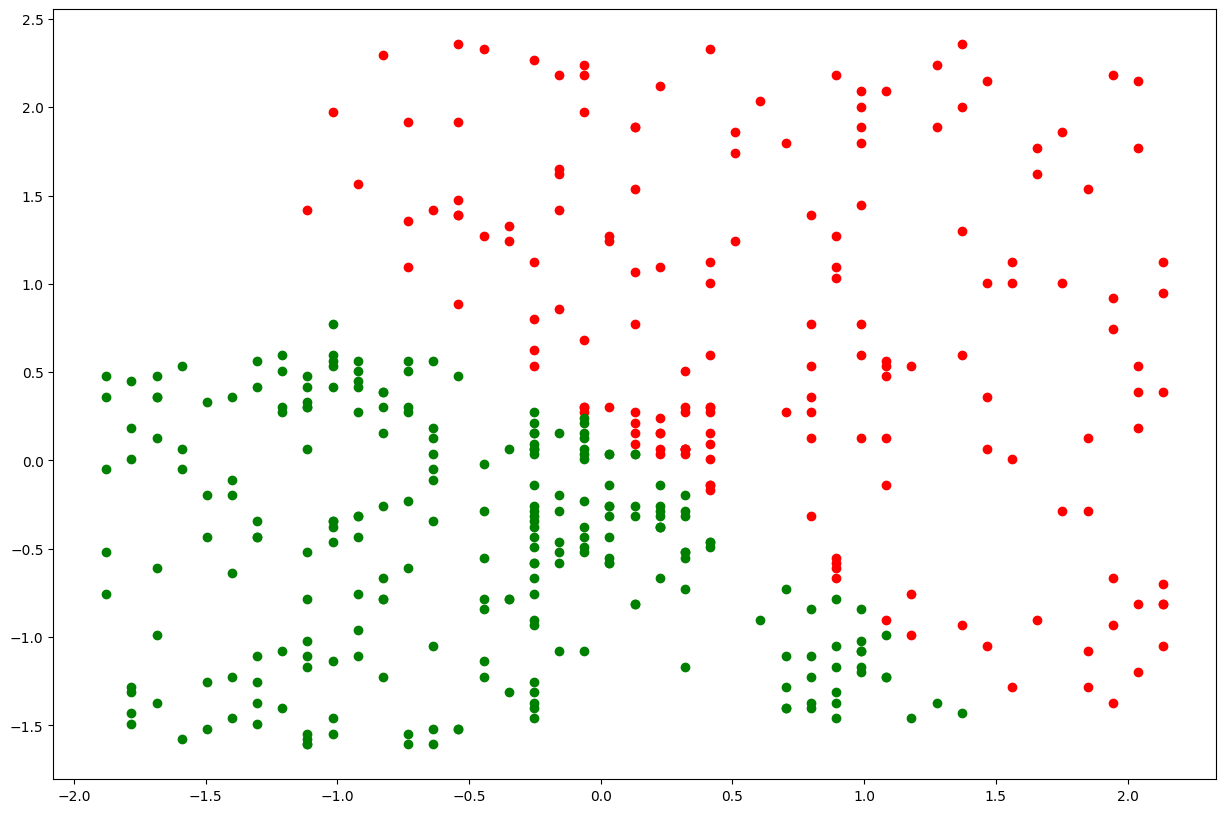

In [18]:
plt.scatter(compras_atributos[clusters == 0, 0], compras_atributos[clusters == 0, 1], c = 'red')
plt.scatter(compras_atributos[clusters == 1, 0], compras_atributos[clusters == 1, 1], c = 'green')
plt.show()


In [19]:
acuracia = accuracy_score(compras_classes.array,clusters)
print('Acurácia de classificação: {}',format(round(acuracia,3)*100)+'%')

Acurácia de classificação: {} 19.0%


In [20]:
fuzzy = np.amax(grau_pertinencia,axis=0)

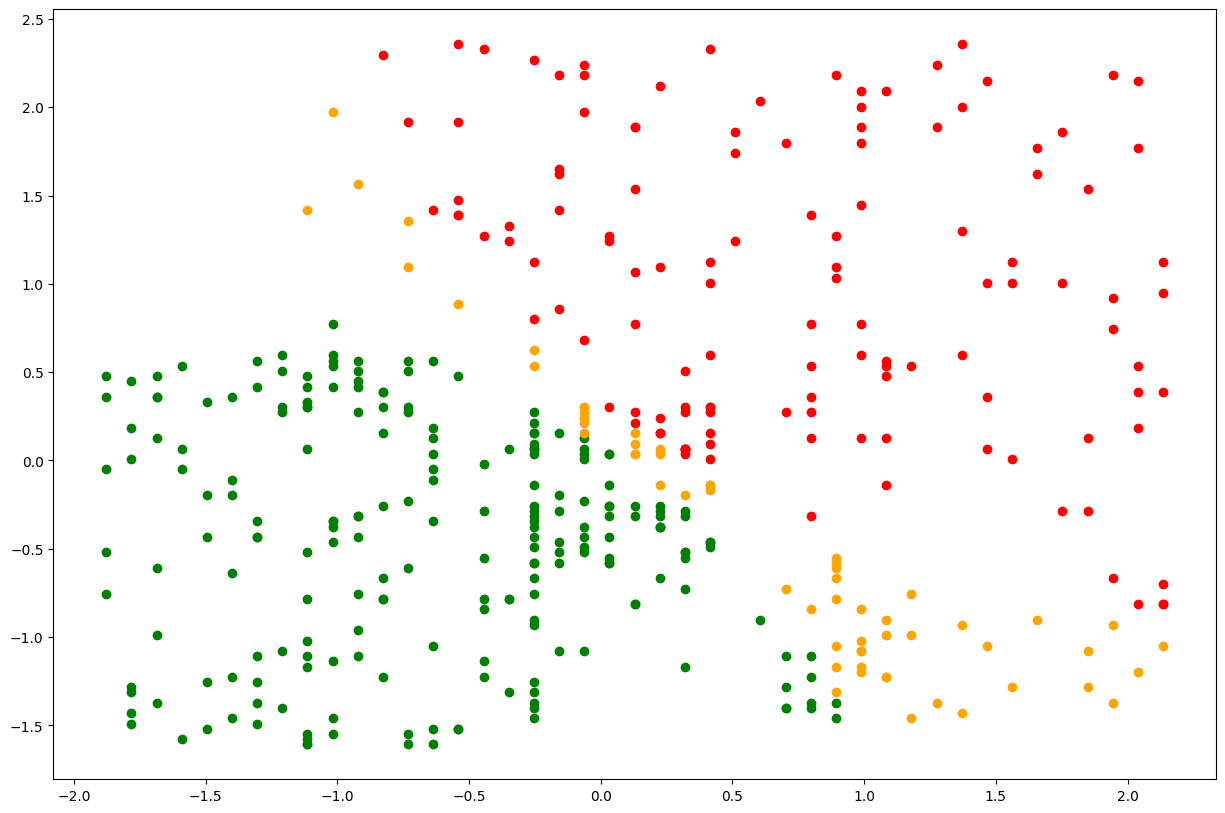

In [21]:


cores = ['red','green','orange']
corte = 0.6

for i, classe in enumerate(clusters):
    if fuzzy[i] >= corte:
       plt.scatter(compras_atributos[i,0], compras_atributos[i,1], color=cores[classe])

    else:
       plt.scatter(compras_atributos[i,0], compras_atributos[i,1], color=cores[len(cores)-1])

plt.show()